In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_path = r'/content/drive/MyDrive/Colab Notebooks/ibm/nutra/dataset/ibm/TRAIN_SET'
test_path = r'/content/drive/MyDrive/Colab Notebooks/ibm/nutra/dataset/ibm/TEST_SET'

## Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.35, zoom_range=0.35, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

### Data Augmentation on Dataset

In [ ]:
x_train = train_datagen.flow_from_directory(train_path,
                                            target_size=(64,64),
                                            batch_size=30,
                                            color_mode='rgb',
                                            class_mode='sparse')

x_test = test_datagen.flow_from_directory(test_path,
                                            target_size=(64,64),
                                            batch_size=30,
                                            color_mode='rgb',
                                            class_mode='sparse')

Found 4118 images belonging to 5 classes.
Found 1233 images belonging to 5 classes.


In [ ]:
print(x_train.class_indices)
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 995, 1: 1354, 2: 1019, 3: 275, 4: 475})

## Creating Model

### Model Skeleton

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32,(4,4), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(32,(4,4), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=200, activation='relu'))
classifier.add(Dense(units=500, activation='relu'))
classifier.add(Dense(units=1000, activation='relu'))
classifier.add(Dense(units=5000, activation='relu'))
classifier.add(Dense(units=600, activation='relu'))
classifier.add(Dense(units=100, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 32)        16416     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_14 (Dense)            (None, 200)              

### Compining the Model

In [ ]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fitting the model

In [ ]:
classifier.fit(x_train,
               steps_per_epoch=len(x_train),
               epochs=100,
               validation_data=x_test,
               validation_steps=len(x_test))

Epoch 1/100
138/138 [==============================] - 160s 1s/step - loss: 0.5955 - accuracy: 0.7912 - val_loss: 0.3793 - val_accuracy: 0.8524
Epoch 2/100
138/138 [==============================] - 16s 117ms/step - loss: 0.5445 - accuracy: 0.8096 - val_loss: 0.3773 - val_accuracy: 0.8524
Epoch 3/100
138/138 [==============================] - 17s 121ms/step - loss: 0.4684 - accuracy: 0.8298 - val_loss: 0.3418 - val_accuracy: 0.8629
Epoch 4/100
138/138 [==============================] - 16s 118ms/step - loss: 0.4132 - accuracy: 0.8492 - val_loss: 0.4124 - val_accuracy: 0.8386
Epoch 5/100
138/138 [==============================] - 16s 117ms/step - loss: 0.3964 - accuracy: 0.8545 - val_loss: 0.3467 - val_accuracy: 0.8824
Epoch 6/100
138/138 [==============================] - 16s 118ms/step - loss: 0.4011 - accuracy: 0.8497 - val_loss: 0.3363 - val_accuracy: 0.8702
Epoch 7/100
138/138 [==============================] - 16s 117ms/step - loss: 0.4787 - accuracy: 0.8269 - val_loss: 0.4037 - v

In [ ]:
classifier.save('nutrition.h5')

## Predicting Results

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

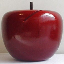

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/ibm/nutra/dataset/ibm/TRAIN_SET/APPLES/n07740461_10336.jpg', target_size=(64,64))
img

In [ ]:
x=image.img_to_array(img)
x.ndim

3

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x.ndim

4

In [ ]:
pred = classifier.predict(x)
pred

1/1 [==============================] - 0s 94ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'APPLES'

1/1 [==============================] - 0s 15ms/step
APPLES


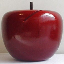

In [ ]:
## Apple path
image_path = '/content/drive/MyDrive/Colab Notebooks/ibm/nutra/dataset/ibm/TRAIN_SET/APPLES/n07740461_10336.jpg'

## Banana path
# image_path = '/content/drive/MyDrive/Colab Notebooks/ibm/nutra/dataset/ibm/TEST_SET/BANANA/2PNGRNZS99N0.jpg'

## Orange path
# image_path = '/content/drive/MyDrive/Colab Notebooks/ibm/nutra/dataset/ibm/TRAIN_SET/ORANGE/n07749192_10192.jpg'

## Pineapple path
# image_path = '/content/drive/MyDrive/Colab Notebooks/ibm/nutra/dataset/ibm/TRAIN_SET/PINEAPPLE/327_100.jpg'

## Watermelon path
# image_path = '/content/drive/MyDrive/Colab Notebooks/ibm/nutra/dataset/ibm/TRAIN_SET/WATERMELON/114_100.jpg'


labels=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
img = image.load_img(image_path, target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = classifier.predict(x)
print(labels[np.argmax(pred)])
img